In [2]:
options(warn=-1)
data1<-read.csv("/Users/mihailkondrasin/Desktop/Матпрак/CSVS/Priem.csv",fileEncoding="UTF-16")
mycol<-rgb(0,0,255,max=255,alpha=120)
data2<-read.csv("/Users/mihailkondrasin/Desktop/Матпрак/CSVS/tips.csv")
data3<-read.csv("/Users/mihailkondrasin/Desktop/Матпрак/CSVS/titanic.csv")
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



1. Построить на одном графике графики плотностей N (0, k), k = 1, ..., n (например, для n = 7).

In [ ]:
n=readline("n=")
curve(dnorm(x,0,1),-10,10,col=1,ylab='y')
for (i in 2:n){
    curve(dnorm(x,0,i),-10,10,col=i,add=TRUE)
}
names=0
for (i in 1:n){
    names[i]<-paste("N(0,",as.character(i),")",sep="")
}
colours=0
colours[1:n]=1:n
legend(2.5,0.3,legend=names,fill=colours)

2. Моделировать 1000 реализаций с.в. X ∼ Bin(100, 0.04) и с.в. Y ∼ Poiss(4). Построить столбцовые диаграммы отдельно и на одном графике, сравнить. То же для X ∼ Bin(1000, 0.004) и X ∼ Bin(10, 0.4).

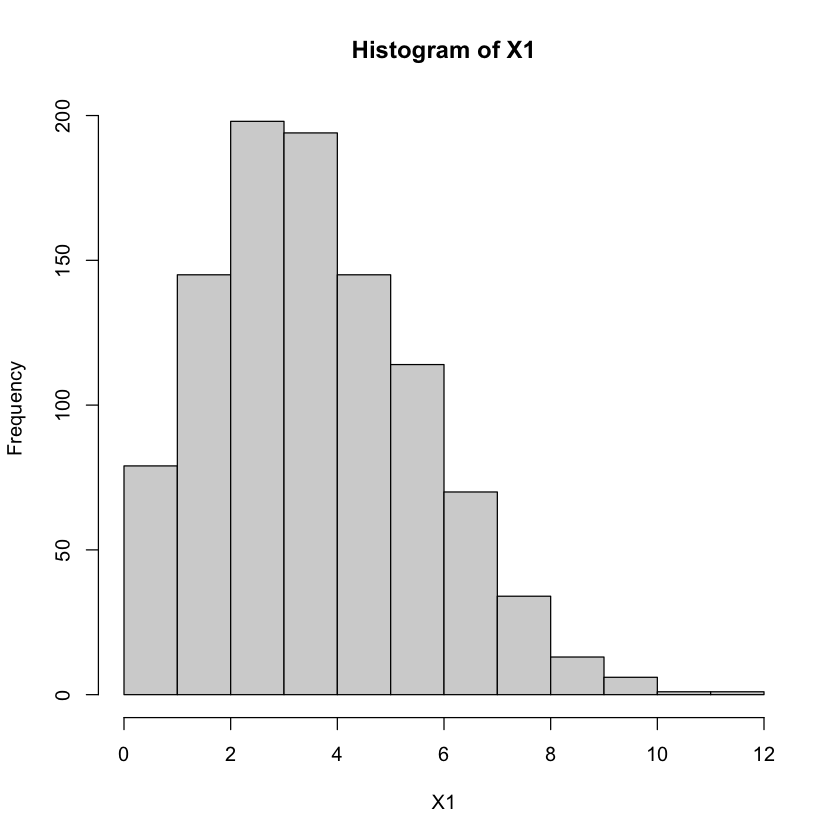

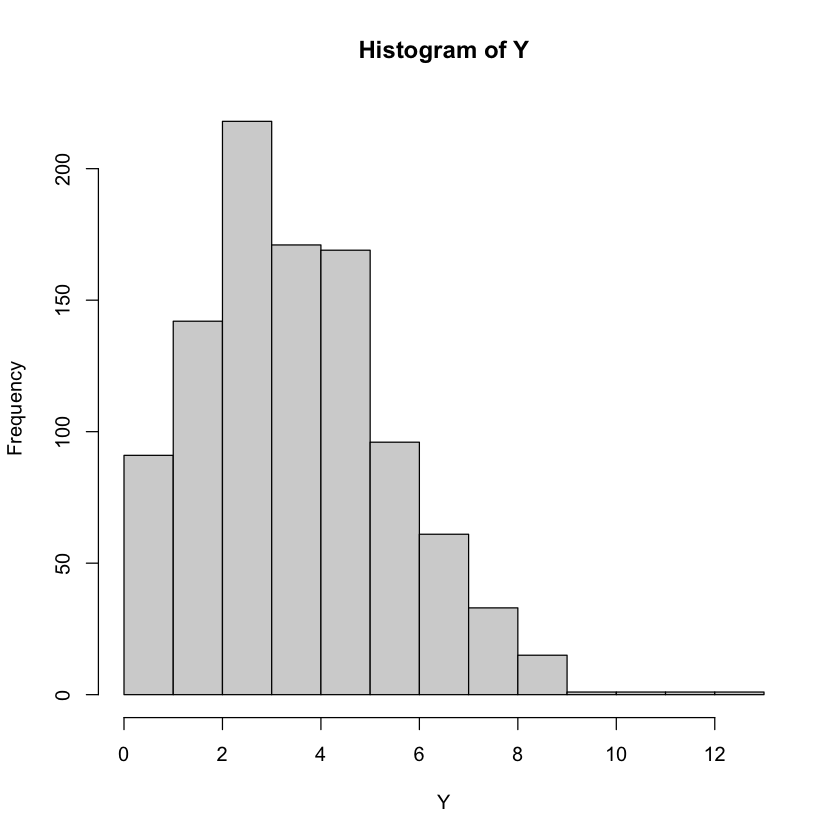

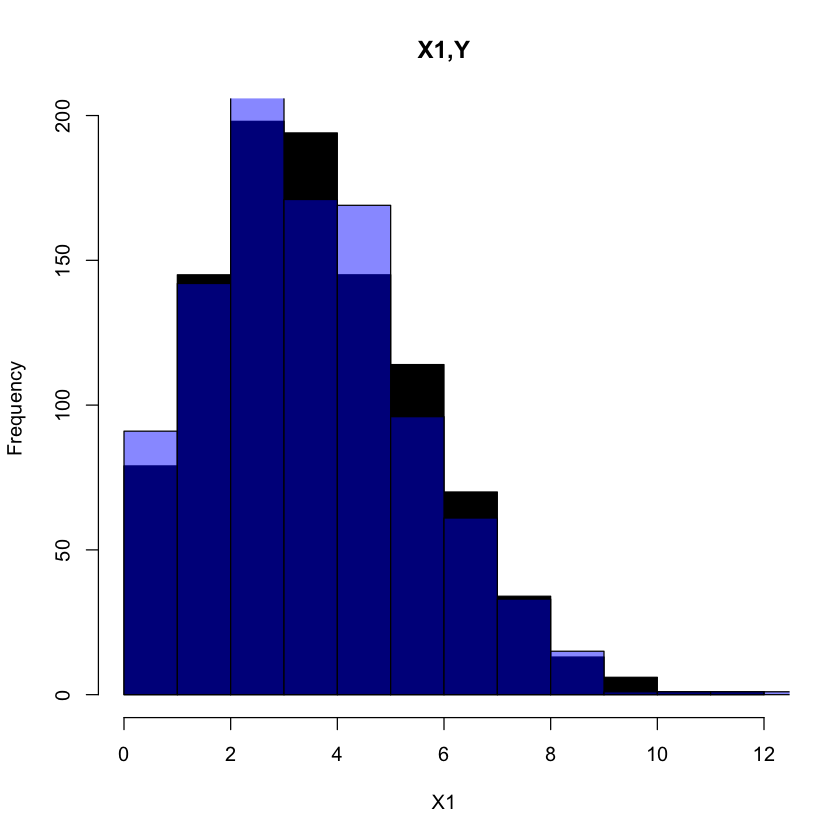

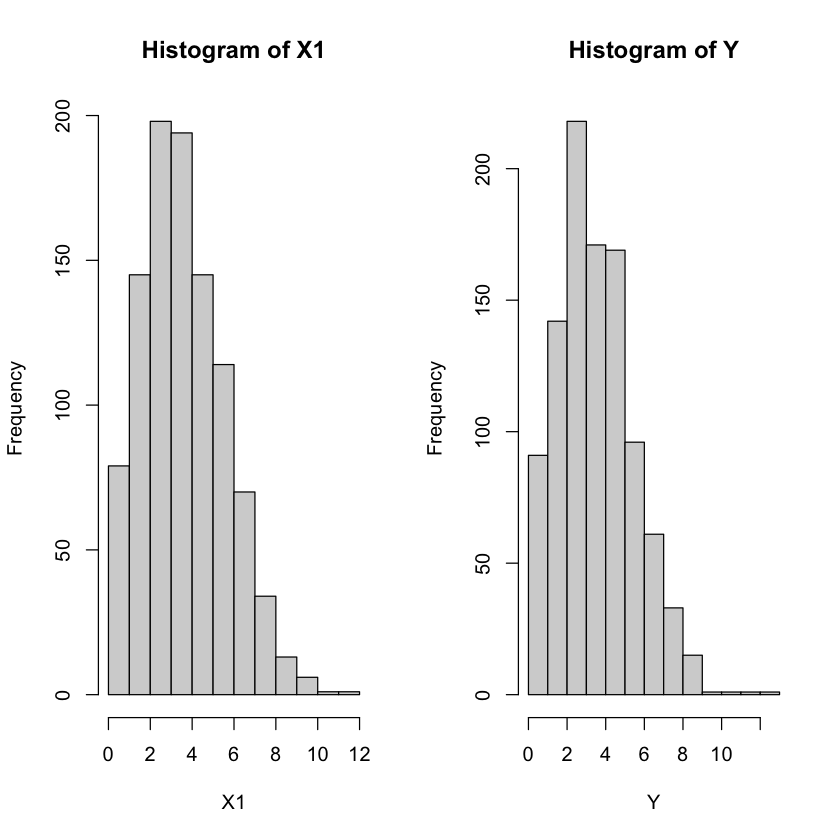

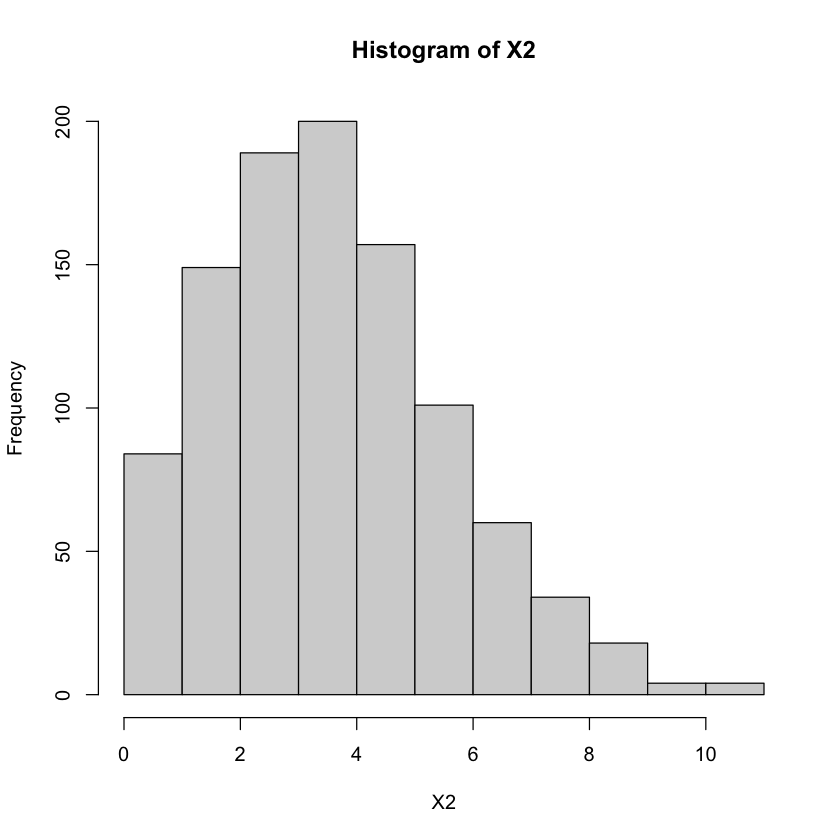

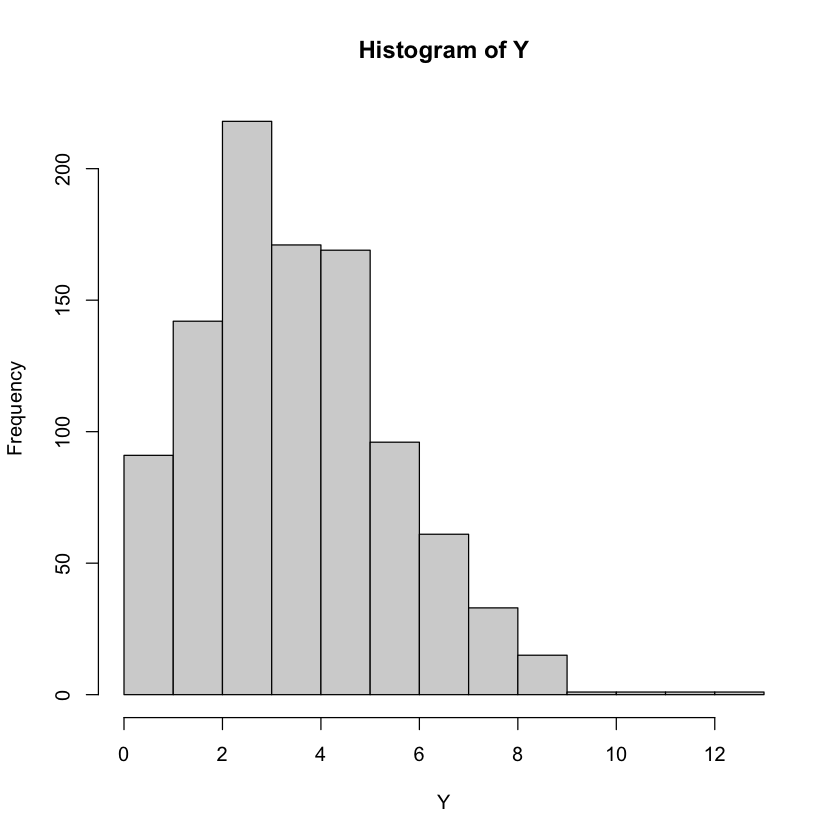

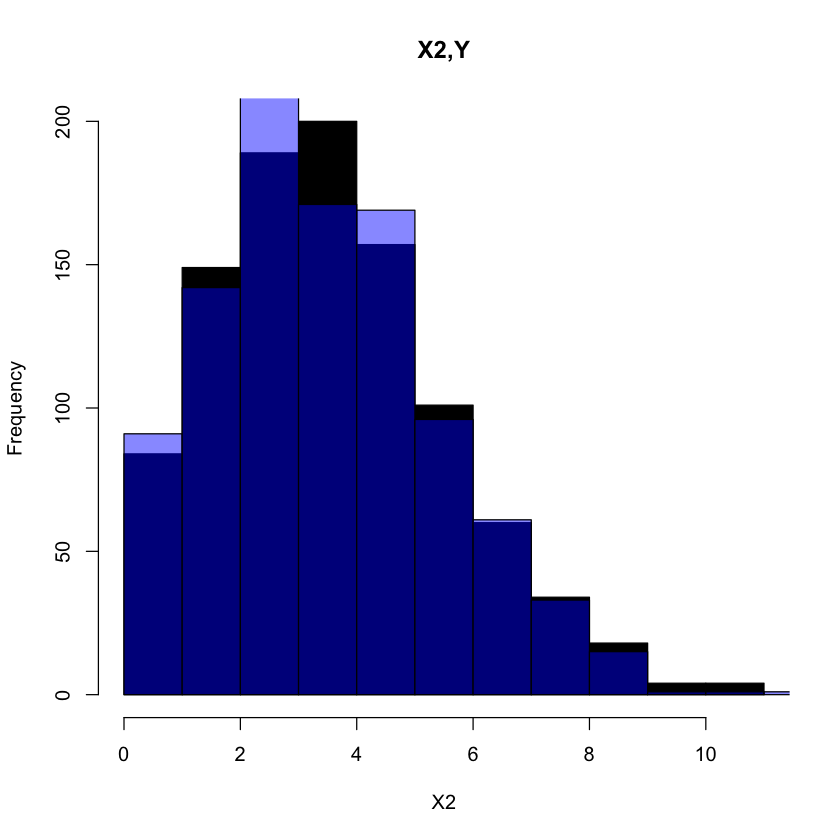

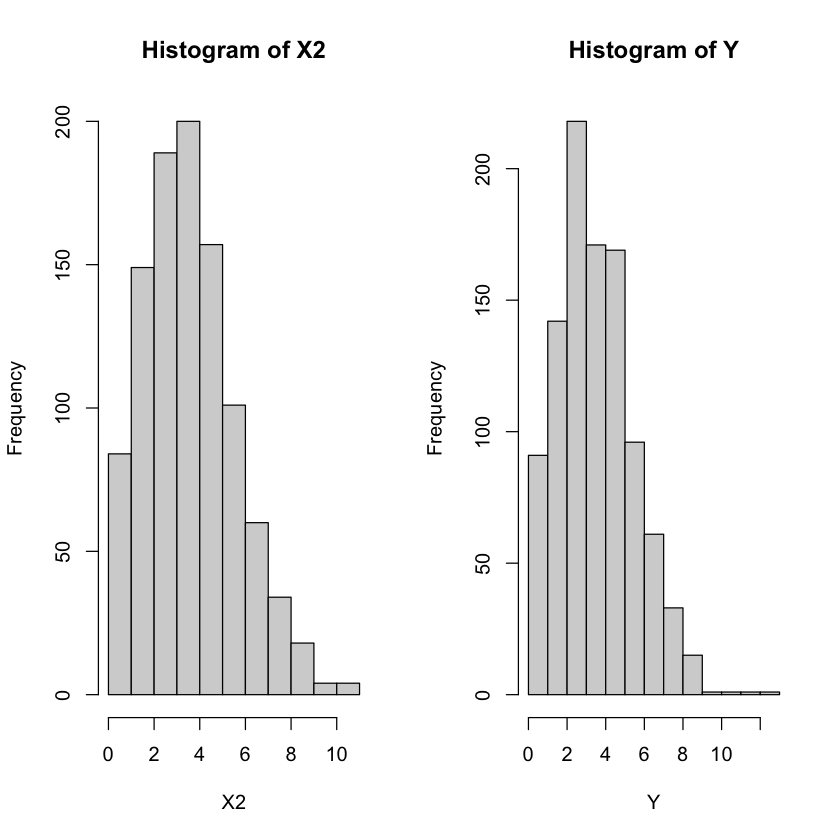

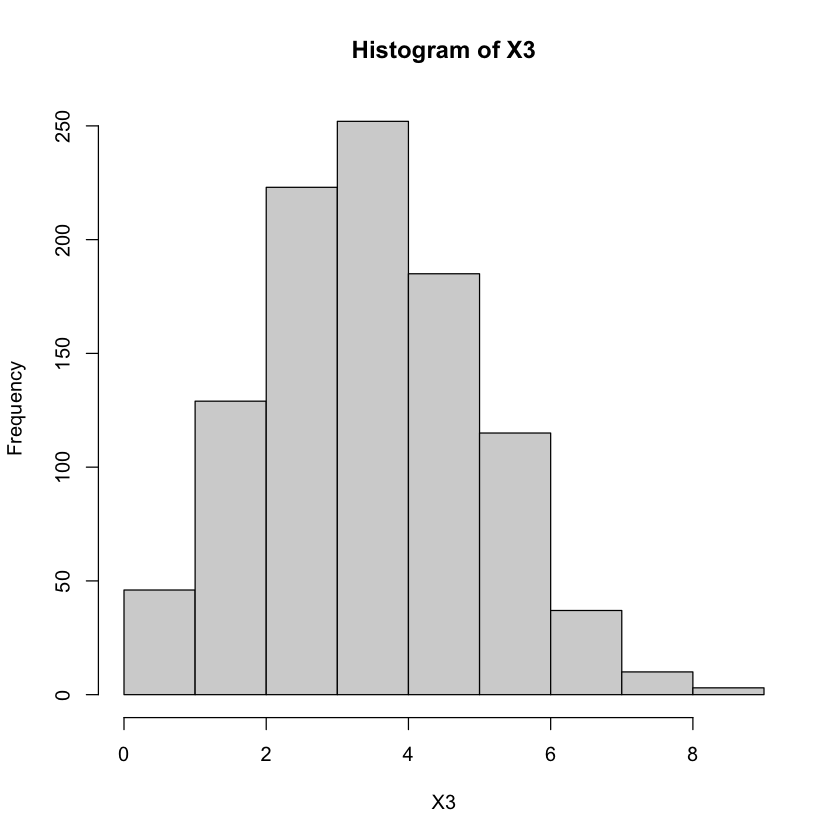

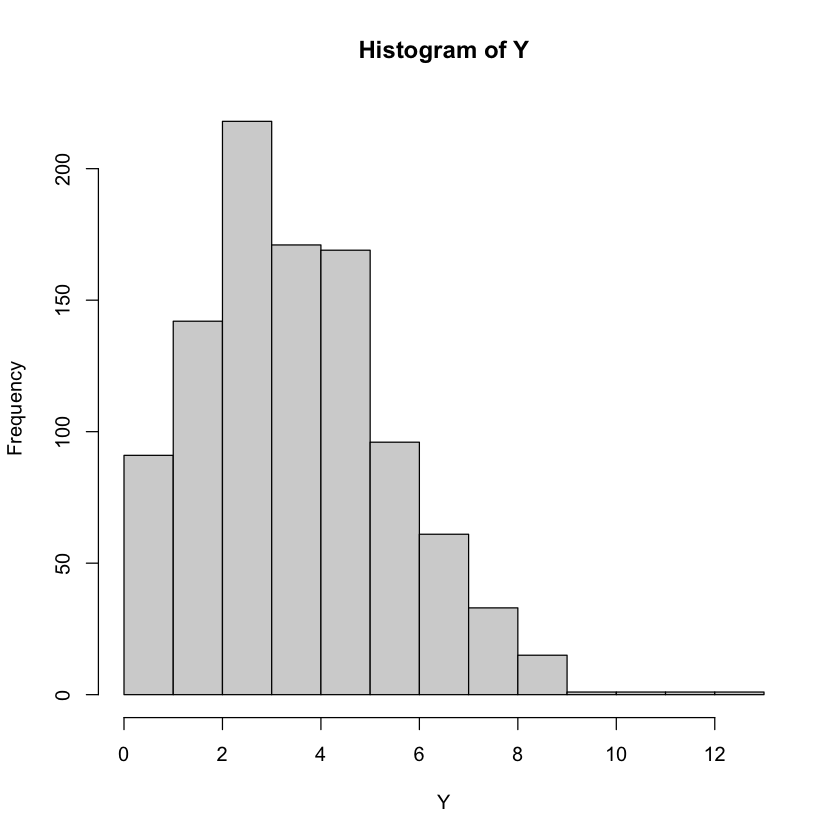

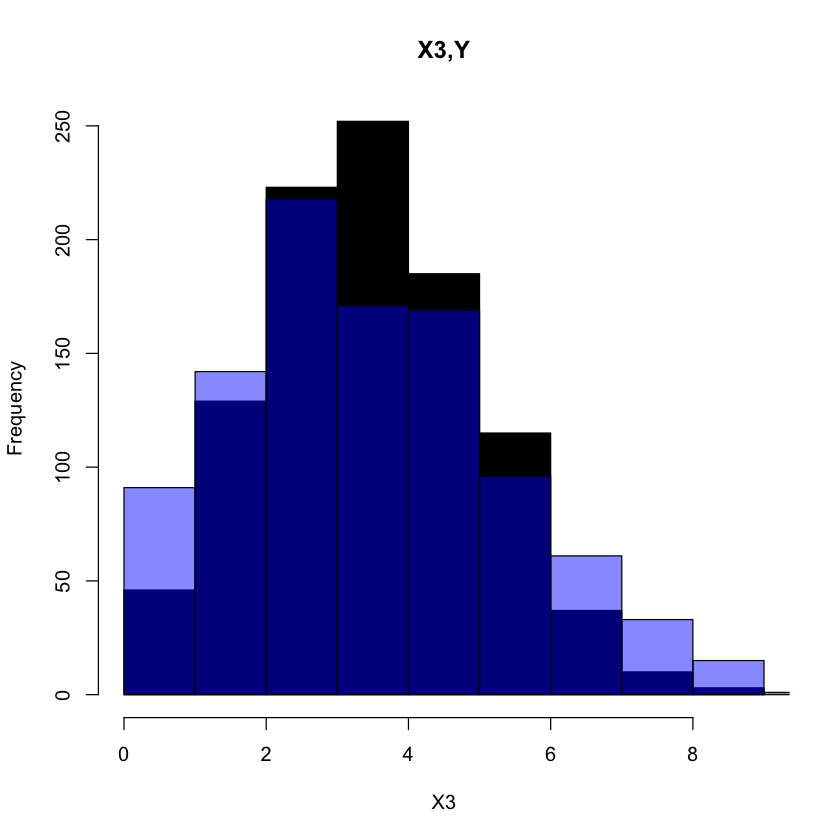

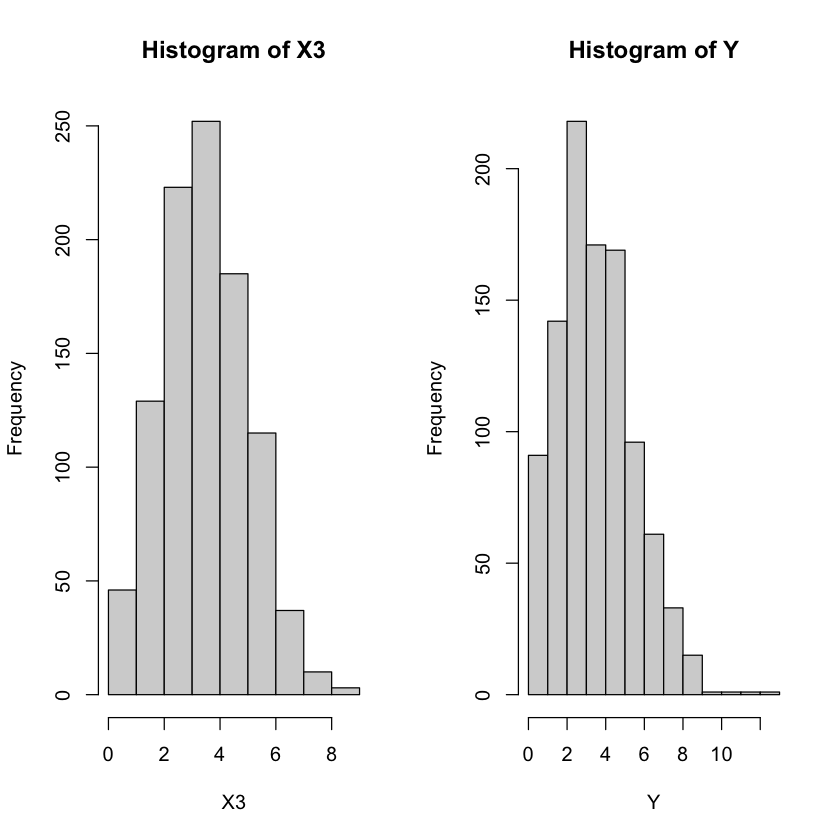

In [3]:
X1<-rbinom(1000,100,0.04)
X2<-rbinom(1000,1000,0.004)
X3<-rbinom(1000,10,0.4)
Y<-rpois(1000,4)
hist(X1)
hist(Y)
hist(X1,col=1,main="X1,Y")
hist(Y,col=mycol,add= TRUE)
par(mfrow=c(1,2))
hist(X1)
hist(Y)
par(mfrow=c(1,1))
hist(X2)
hist(Y)
hist(X2,col=1,,main="X2,Y")
hist(Y,col=mycol,add= TRUE)
par(mfrow=c(1,2))
hist(X2)
hist(Y)
par(mfrow=c(1,1))
hist(X3)
hist(Y)
hist(X3,col=1,,main="X3,Y")
hist(Y,col=mycol,add= TRUE)
par(mfrow=c(1,2))
hist(X3)
hist(Y)

3. Построить гистограммы баллов по математике и по русскому: а) по отдельности, б) на одном графике, сравнить их.

In [ ]:
print("а)")
hist(data1$"ЕГЭ...рус.яз.",seq(45,100,length.out=13))
hist(data1$"ЕГЭ...матем.",seq(45,100,length.out=13))
print("б)")
par(mfcol=c(1,2))
hist(data1$"ЕГЭ...рус.яз.",seq(45,100,length.out=13))
hist(data1$"ЕГЭ...матем.",seq(45,100,length.out=13))
hist(data1$"ЕГЭ...рус.яз.",breaks=
    seq(45,100,length.out=13),
     col=1,main="На одном"
    )
hist(data1$"ЕГЭ...матем.", add= TRUE, seq(45,100,length.out=13),col=mycol)

4. Построить диаграмму рассеяния баллов ЕГЭ по математике и по русскому.

In [ ]:
plot(data1$"ЕГЭ...рус.яз.",data1$"ЕГЭ...матем.")

5. Построить диаграмму рассеяния баллов ЕГЭ по математике и по русскому, разными цветами показав пол абитуриента.

In [ ]:
colour=0
for (i in (1:nrow(data1))){
    if (data1$"Пол"[i]=="ЖЕНСКИЙ"){
        colour[i]<-"red"
    }else{
        colour[i]<-"blue"
    }
}
x=rnorm(nrow(data1),0,0.3)
y=rnorm(nrow(data1),0,0.3)
plot(data1$"ЕГЭ...рус.яз."+x,data1$"ЕГЭ...матем."+y,col=colour,cex=0.8)

6. Построить диаграмму рассеяния баллов ЕГЭ по математике и по русскому, размерами точек показав суммарный балл, цветом – пол, формой тип школы.

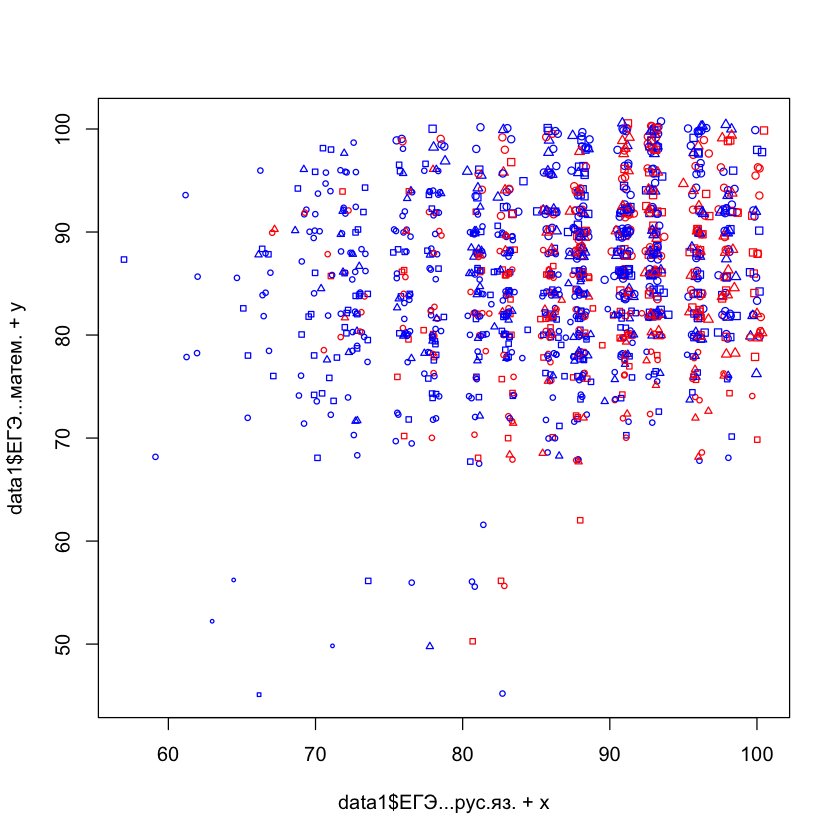

In [2]:
colour=0
for (i in (1:nrow(data1))){
    if (data1$"Пол"[i]=="ЖЕНСКИЙ"){
        colour[i]<-"red"
    }else{
        colour[i]<-"blue"
    }
}
sizes=0
for (i in (1:nrow(data1))){
    sizes=round((data1$"ЕГЭ...рус.яз."+data1$"ЕГЭ...матем.")/50)
}
forms=0
for (i in (1:nrow(data1))){
    if (data1$"Тип.насел..пункта"[i]=="ГОРОД"){
        forms[i]=0#квадрат
    }
    if (data1$"Тип.насел..пункта"[i]=="ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ"){
        forms[i]=1#круг
    }
    if (data1$"Тип.насел..пункта"[i]=="ЦЕНТР СУБЪЕКТА ФЕДЕРАЦИИ"){
        forms[i]=2#треугольник
    }
}
x=rnorm(nrow(data1),0,0.3)
y=rnorm(nrow(data1),0,0.3)
plot(data1$"ЕГЭ...рус.яз."+x,data1$"ЕГЭ...матем."+y,col=colour,cex=sizes/4*0.8,pch=forms)

7. Для массива данных "tips" построить boxplot() для размера чаевых по дням недели.

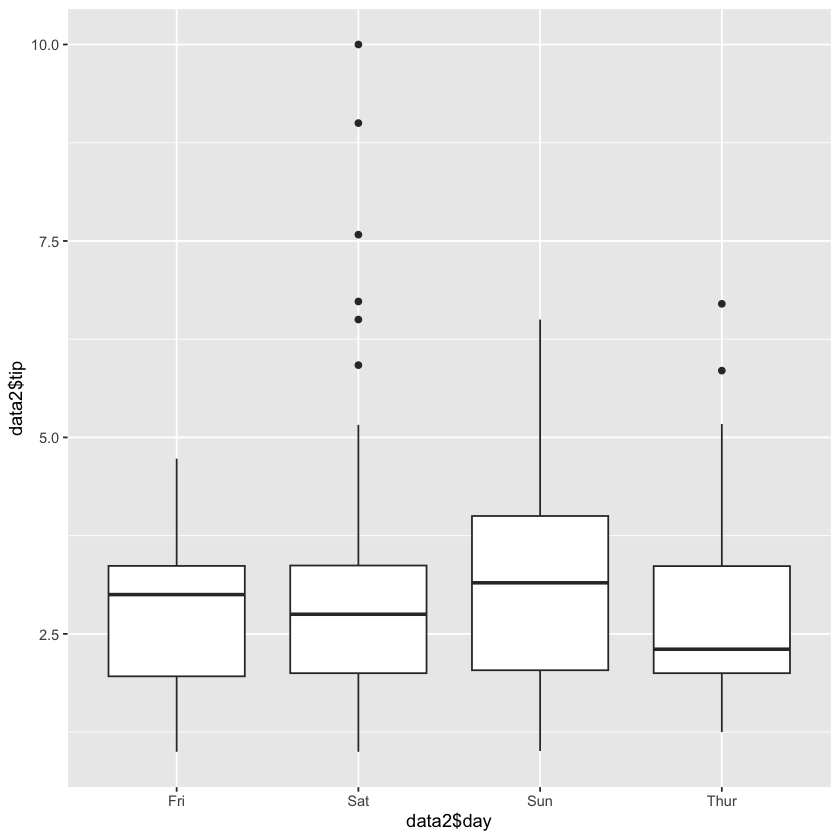

In [4]:
ggplot(data2,aes(x=data2$"day",y=data2$"tip"))+geom_boxplot()

8. Для массива данных "titanic" сравнить выживших и невыживших пассажиров с помощью параллельных координат, используя столбцы survived, pclass, who (нужно будет присвоить числовые значения), age. (Не стоит использовать весь массив, лучше выбрать случайным образом 30 строк).

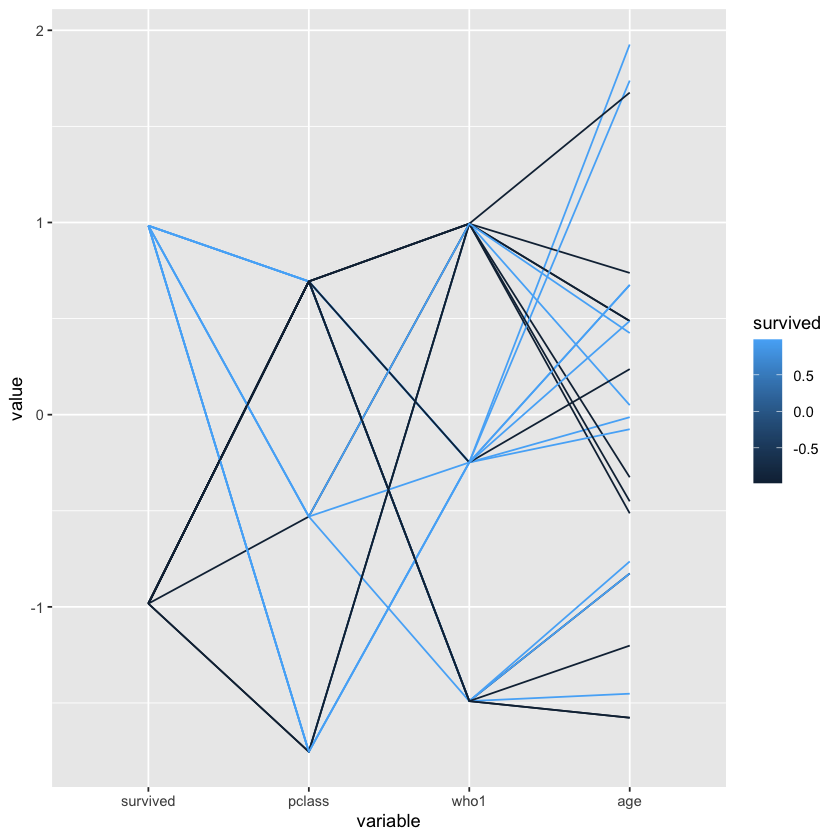

In [3]:
data4<-data3[sample(30),]
who1=0
for (i in (1:30)){
    if (data4$'who'[i]=="child"){
        who1[i]=1
    }
    if (data4$'who'[i]=="woman"){
        who1[i]=2
    }
    if (data4$'who'[i]=="man"){
        who1[i]=3
    }
}
data4<-cbind(data4,who1)
data4<-data4[,c(1,2,16,4)]
ggparcoord(data4,groupColumn=1)